In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data = pd.read_csv("webtraffic.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


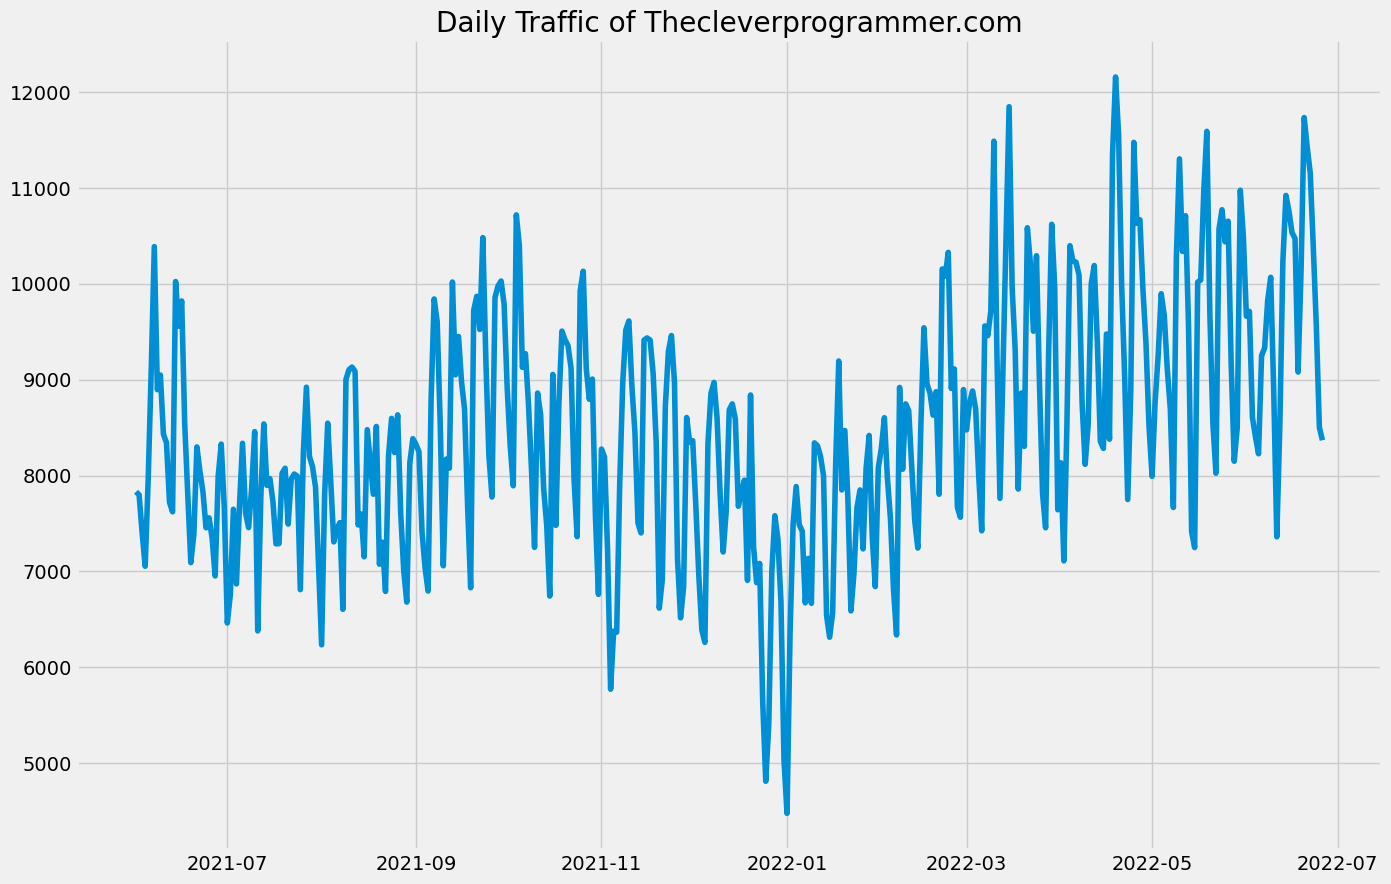

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

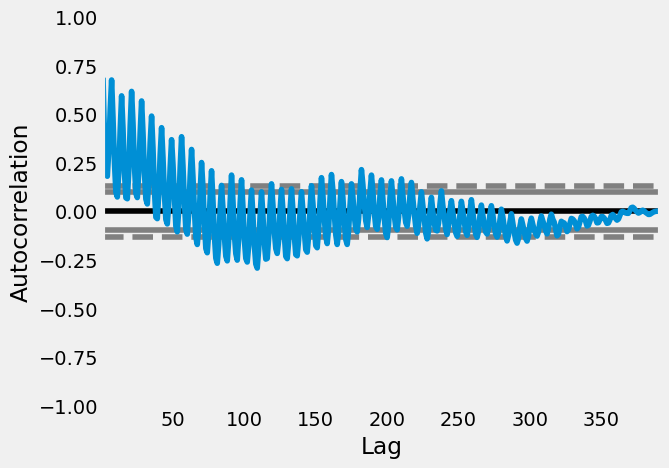

In [6]:
pd.plotting.autocorrelation_plot(data["Views"])

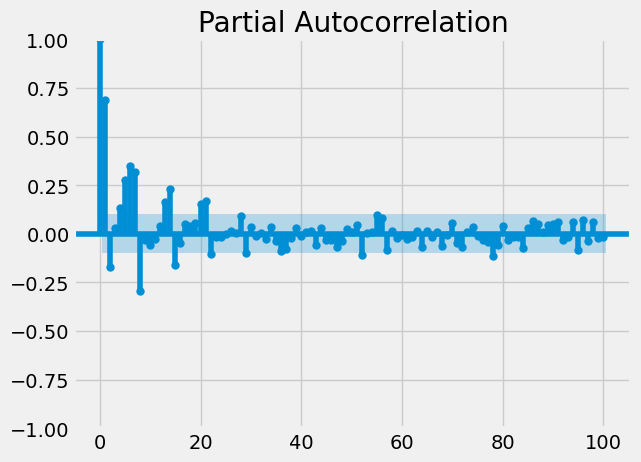

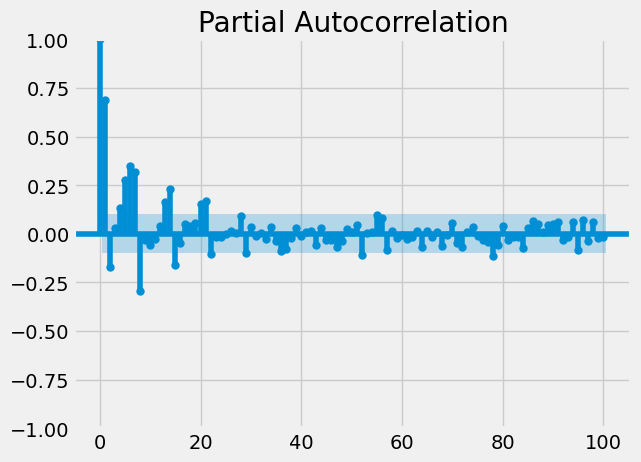

In [7]:
plot_pacf(data["Views"], lags = 100)

In [8]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\LENOVO\ana2\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\ana2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.334
Date:                            Fri, 08 Sep 2023   AIC                           6228.668
Time:                                    14:18:30   BIC                           6287.692
Sample:                                         0   HQIC                          6252.094
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7954      0.133      5.978      0.000       0.535       1.056
ar.L2         -0.7814      0.136   

In [9]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9861.970975
392    10764.206345
393    10720.761591
394     9836.807946
395     8752.267839
396     8196.322482
397     8903.700505
398     9679.473557
399    10268.492464
400    10588.400538
401     9785.866069
402     9313.425300
403     9013.124892
404     9054.329118
405    10526.118171
406    10988.173521
407    10840.067054
408    10018.908280
409     9399.339410
410     8593.468619
411     9138.516222
412    10391.594553
413    10592.382711
414    10765.971529
415    10220.577879
416     9401.558297
417     9024.982551
418     9159.700992
419     9904.545067
420    10235.074301
421    10690.659600
422     9855.273105
423     9506.029125
424     9036.786271
425     8781.778849
426    10109.032613
427    10822.640317
428    10872.680368
429    10350.185732
430     9383.546073
431     8621.983684
432     8665.022170
433    10036.774204
434    10484.575196
435    10799.042865
436    10434.788758
437     9271.547995
438     9129.804218
439     9328.067856
440    10285.342816


<Axes: >

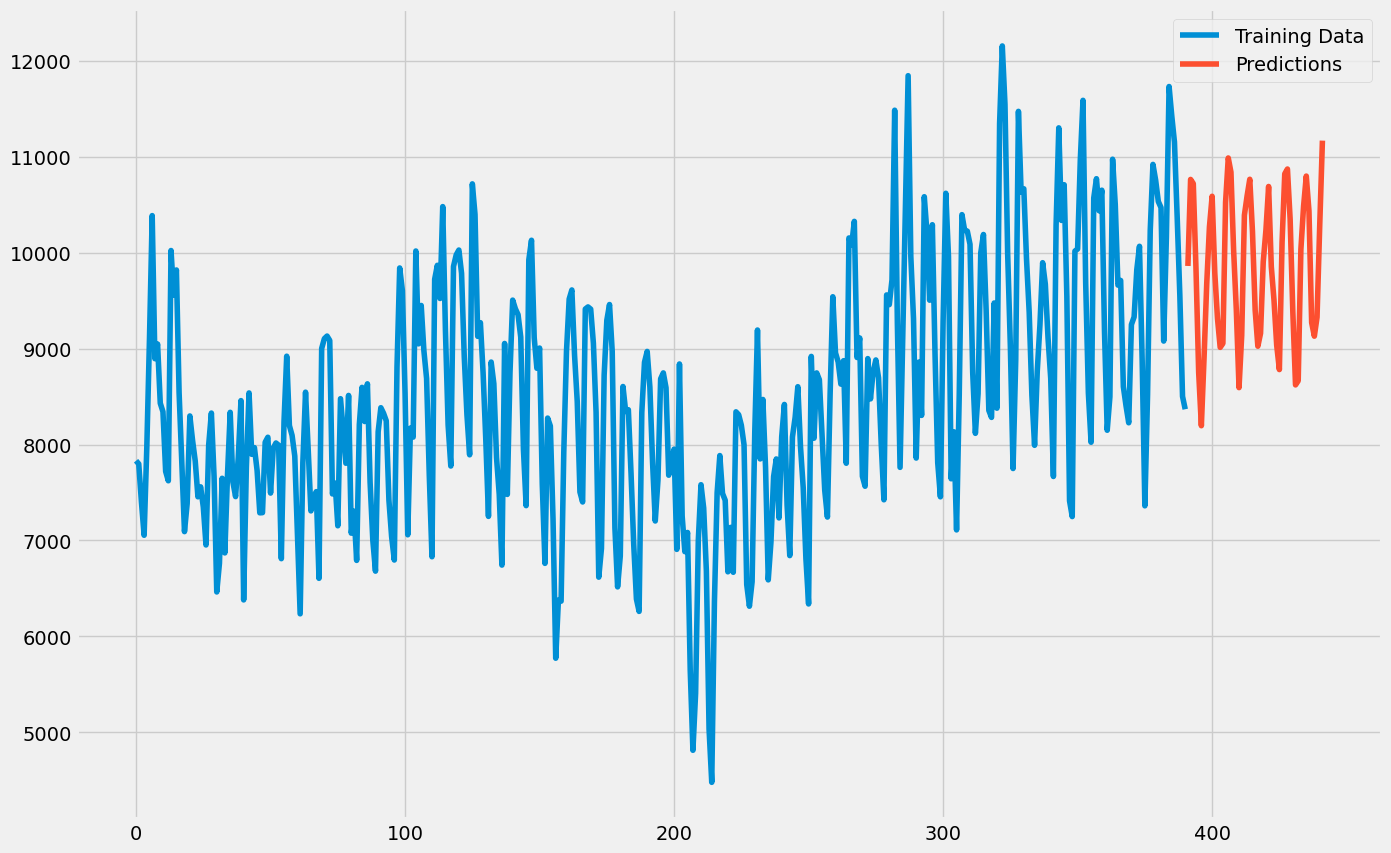

In [10]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")